In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "weatherHistory.csv"  # <-- Use exact filename

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "muthuj7/weather-dataset",
    file_path
)

print("First 5 records:")
print(df.head())


/var/folders/5y/2hbk580d6h73g30qwsb08tzh0000gn/T/ipykernel_16216/3465582514.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████████████████████████████████| 2.23M/2.23M [00:01<00:00, 1.52MB/s]

Extracting zip of weatherHistory.csv...


First 5 records:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0       

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.rename(columns={'Formatted Date': 'Date', 'Temperature (C)': 'Temp_C'}, inplace=True)

In [8]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Date                      96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temp_C                    96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

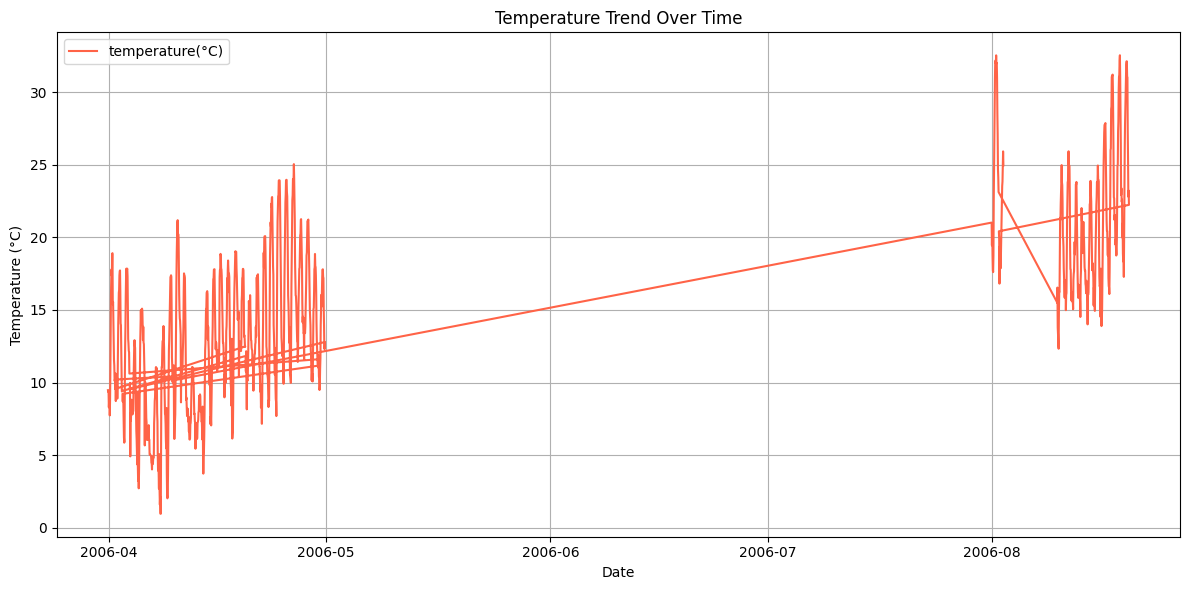

In [26]:
sample_df = df.head(1000)

plt.figure(figsize=(12,6))
plt.plot(sample_df['Date'], sample_df['Temp_C'], color='tomato', label='temperature(°C)')

plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.show()

           


In [28]:
sample_df = sample_df.sort_values('Date')


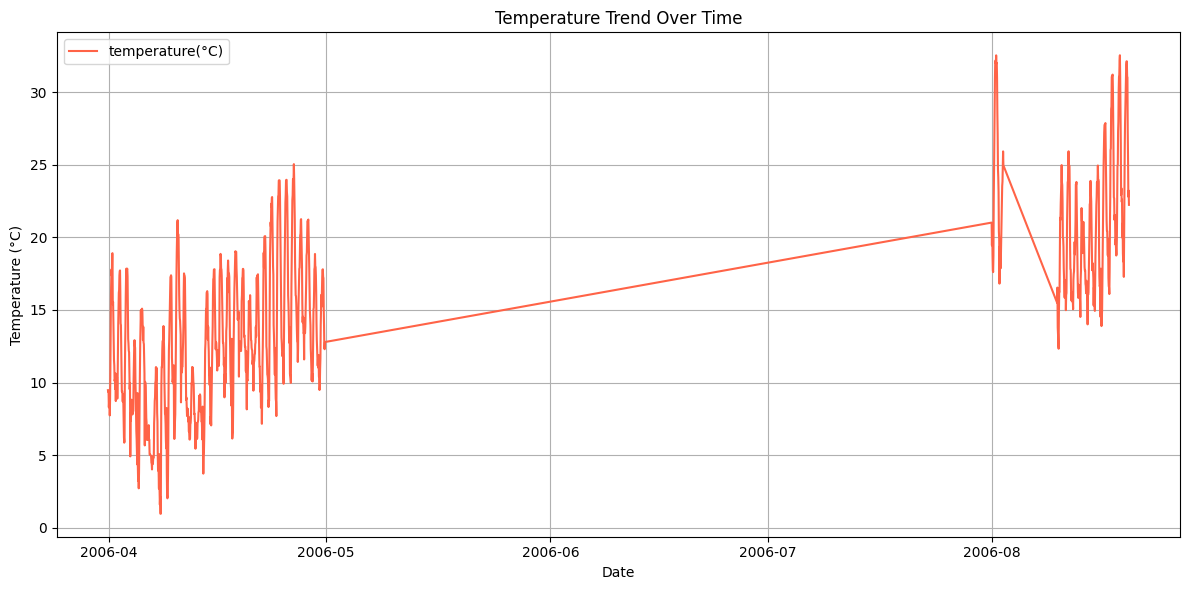

In [35]:

plt.figure(figsize=(12,6))
plt.plot(sample_df['Date'], sample_df['Temp_C'], color='tomato', label='temperature(°C)')

plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.show()

           


/var/folders/5y/2hbk580d6h73g30qwsb08tzh0000gn/T/ipykernel_16216/4177977632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Temp_Rolling'] = sample_df['Temp_C'].rolling(window=24).mean()  # 24 hours (1 day)


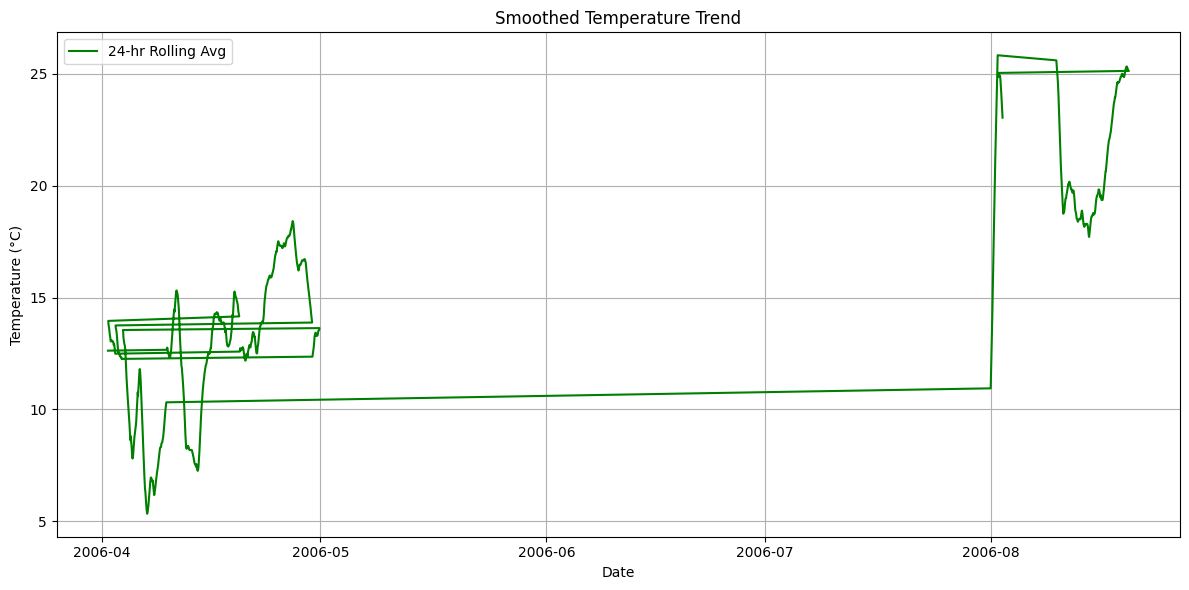

In [30]:
sample_df['Temp_Rolling'] = sample_df['Temp_C'].rolling(window=24).mean()  # 24 hours (1 day)

plt.figure(figsize=(12, 6))
plt.plot(sample_df['Date'], sample_df['Temp_Rolling'], color='green', label='24-hr Rolling Avg')
plt.title("Smoothed Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


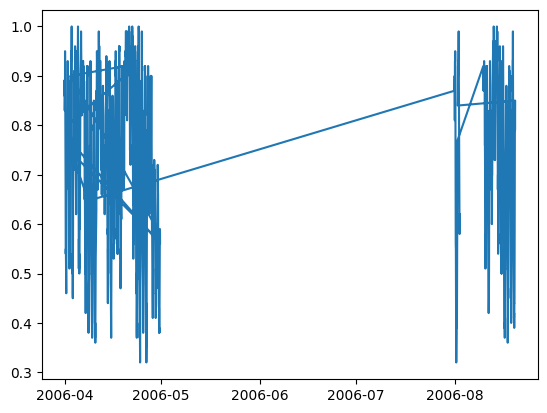

In [31]:
plt.plot(sample_df['Date'], sample_df['Humidity'], label='Humidity')


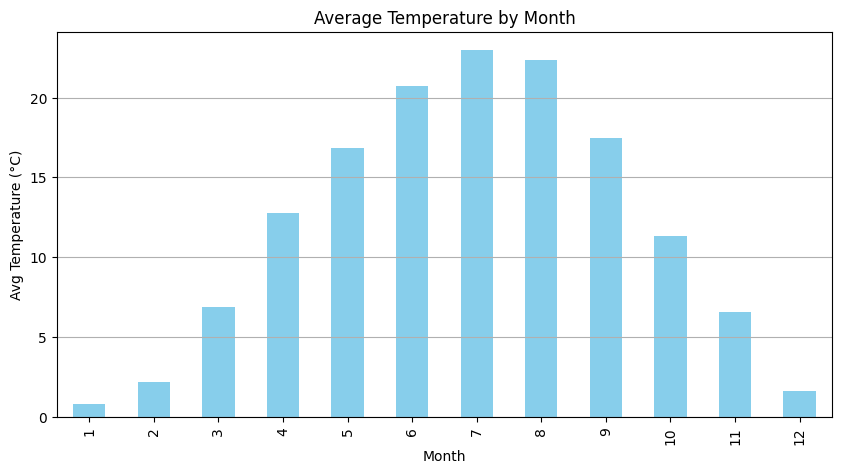

In [32]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Temp_C'].mean()

monthly_avg.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.grid(axis='y')
plt.show()


In [33]:
print(df['Temp_C'].isna().sum())
print(df['Date'].isna().sum())


0
0


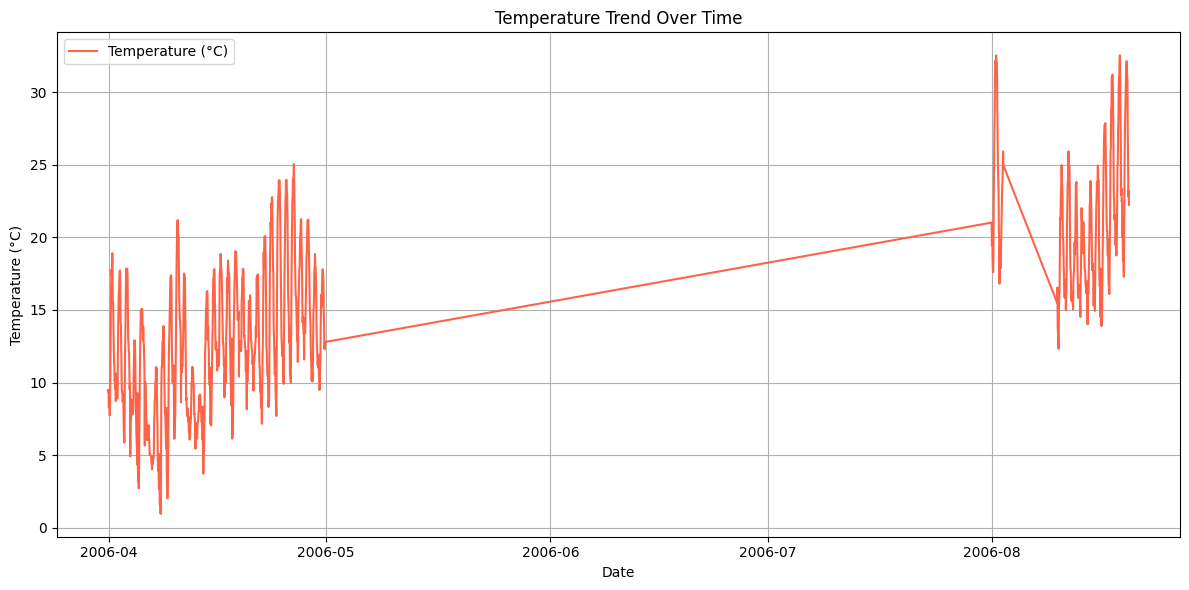

In [34]:
import matplotlib.pyplot as plt

# Take the first 1000 rows
sample_df = df.head(1000)

# Drop rows with missing Date or Temp_C
sample_df = sample_df.dropna(subset=['Date', 'Temp_C'])

# Sort by date
sample_df = sample_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sample_df['Date'], sample_df['Temp_C'], color='tomato', label='Temperature (°C)')

plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
